In [1]:
import mefikit as mf
import pyvista as pv
pv.set_jupyter_backend('static')

In [2]:
a = mf.data.cmesh3()

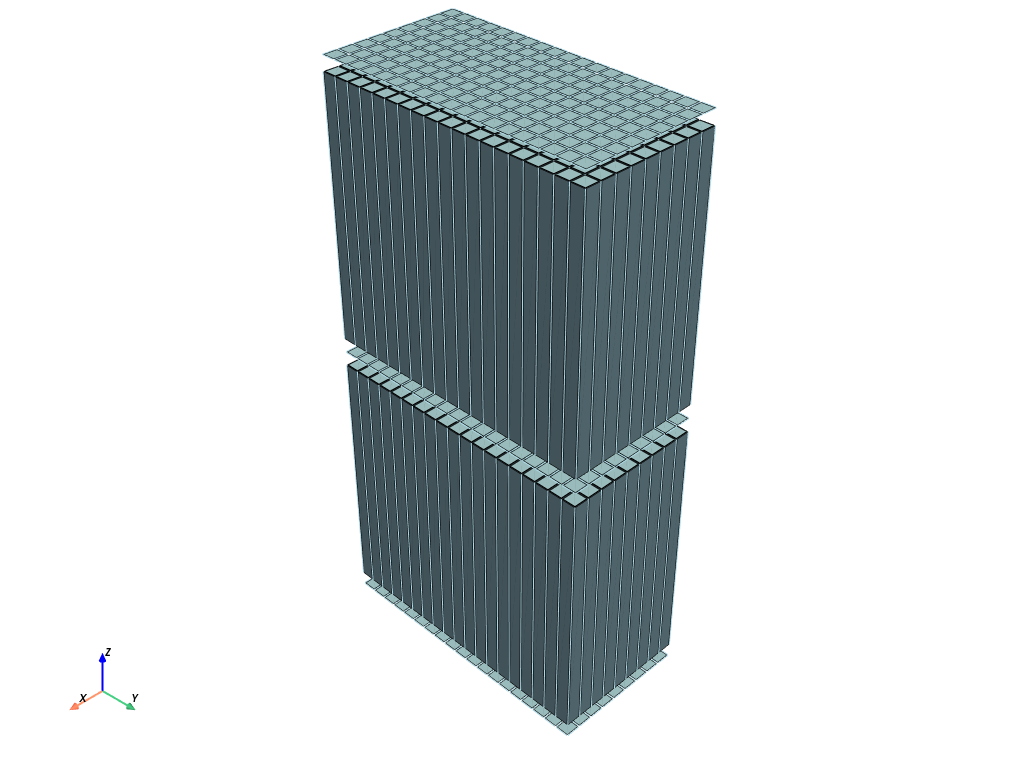

In [3]:
a.to_pyvista().shrink(0.9).plot(show_edges=True)